### Метрики классификации [Домашнее задание]

**Примечание:**

> Пожалуйста, не удаляйте комментарии или строки кода.

1. Пожалуйста, импортируйте необходимые библиотеки:

```python
numpy
sklearn
```

In [1]:
# Начало кода
import numpy as np
import sklearn as sl
# Конец кода

2. Создайте два ```np.ndarray``` массива ```targets```, ```predictions``` формы ```(100,)``` каждый, с целыми числами от 0 до 1. Сначала сгенерируйте массив ```targets```, а затем ```predictions```. (Установите ```np.random.seed``` на 1)

In [2]:
# Начало кода
np.random.seed(1)
targets = np.random.choice([0, 1], size=100)
predictions = np.random.choice([0, 1], size=100)
# Конец кода
print(targets[:10])
print(predictions[:10])

[1 1 0 0 1 1 1 1 1 0]
[1 1 1 0 0 0 0 0 1 1]


### Ожидаемые результаты:

```python
[1 1 0 0 1 1 1 1 1 0]
[1 1 1 0 0 0 0 0 1 1]
```

3. Пожалуйста, реализуйте функцию ```calc_acc(truth, preds)```, которая будет возвращать ```accuracy```, рассчитанную с использованием ```truth``` и ```preds```. Вы не можете использовать библиотеку ```sklearn``` в этой задаче.

In [3]:
# Начало кода
def calc_acc(truth, preds):
    accuracy = sum(truth == preds) / truth.shape[0]
    return accuracy
# Конец кода
print(calc_acc(targets,predictions))

0.49


### Ожидаемые результаты:

```python
0.49
```

4. Пожалуйста, реализуйте функцию ```conf_matrix(truth, preds)```, которая будет возвращать ```confusion matrix```, рассчитанную с использованием ```truth``` и ```preds```. **Вы не можете использовать библиотеку ```sklearn``` в этой задаче.**

In [4]:
# Начало кода
def conf_matrix(truth, preds):
    k = len(np.unique(truth))
    result = np.zeros((k, k))
        
    for t, p in zip(truth, preds):
        result[t][p] += 1
    return result
# Конец кода
print(conf_matrix(targets,predictions))

[[24. 21.]
 [30. 25.]]


### Ожидаемые результаты:

```python
[[24 21]
 [30 25]]
```

5. Пожалуйста, реализуйте функцию ```precision_recall_fscore(truth, preds)```, которая будет возвращать ```(precision, recall, f1 score)```, рассчитанную с использованием ```truth``` и ```preds```. Вы не можете использовать библиотеку ```sklearn``` в этой задаче.

In [5]:
# Начало кода
def precision_recall_fscore(truth, preds):
    true_pos = sum(1 for t,p in zip(truth, preds) if t==1 and p==1)
    true_neg = sum(1 for t,p in zip(truth, preds) if t==0 and p==0)
    false_neg = sum(1 for t,p in zip(truth, preds) if t==1 and p==0)
    false_pos = sum(1 for t,p in zip(truth, preds) if t==0 and p==1)
    
    precision = true_pos / float(true_pos + false_pos)
 
    recall = true_pos / float(true_pos + false_neg)

    f1_score = 2*precision*recall / (precision + recall)

    return precision, recall, f1_score
# Конец кода
print(precision_recall_fscore(targets,predictions))

(0.5434782608695652, 0.45454545454545453, 0.49504950495049505)


### Ожидаемые результаты:

```python
(0.5434782608695652, 0.45454545454545453, 0.49504950495049505)
```

6. Создайте ```np.ndarray``` массив ```probs``` формы (100,) с помощью ```np.random.random()```. (Установите np.random.seed на 1)

In [6]:
# Начало кода
np.random.seed(1)
probs = np.random.random(100,)
# Конец кода
print(probs[:5])

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01]


### Ожидаемые результаты:

```python
[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01]
```

7. Используя библиотеку ```sklearn```, постройте кривую ROC с использованием массивов ```targets``` и ```probs```, а также рассчитайте значение ```ROC AUC```.

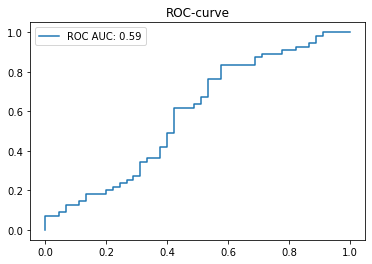

In [7]:
# Начало кода
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, average_precision_score, auc
fpr, tpr, thresholds = roc_curve(targets, probs)
plt.plot(fpr, tpr, label=f"ROC AUC: {round(roc_auc_score(targets, probs),2)}");
plt.legend(loc='best');
plt.title('ROC-curve');
# Конец кода

### Ожидаемые результаты:

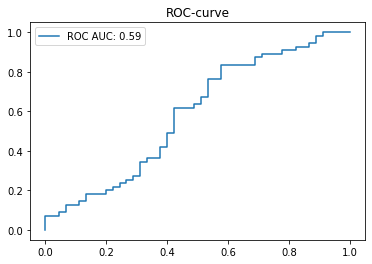

8. Используя библиотеку ```sklearn```, постройте кривую PR с использованием массивов ```targets``` и ```probs```, а также рассчитайте значение ```PR AUC```.

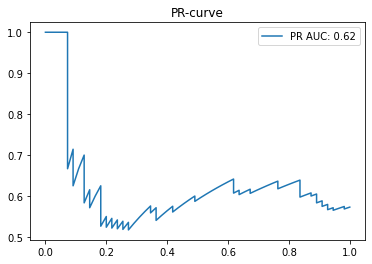

In [8]:
# Начало кода
precision, recall, thresholds = precision_recall_curve(targets, probs)
plt.plot(recall, precision, label=f"PR AUC: {round(auc(recall, precision),2)}");
plt.legend(loc='best');
plt.title('PR-curve');
# Конец кода

### Ожидаемые результаты:

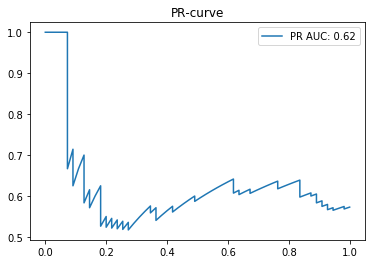

### Отличная работа